In [23]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt

In [24]:
num_points = 1000
np.random.seed(num_points)

# The function to be learned will follow the trend of the cosine function
function_to_learn = lambda x: np.cos(x) + 0.1 * np.random.randn(*x.shape)

In [25]:
layer_1_neurons = 10

In [26]:
batch_size = 100
epochs = 1500

In [27]:
all_x = np.float32(np.random.uniform(-2 * math.pi, 2 * math.pi, (1, num_points))).T
np.random.shuffle(all_x)
train_size = int(900)

In [28]:
x_training = all_x[:train_size]
y_training = function_to_learn(x_training)

In [29]:
x_validation = all_x[train_size:]
y_validation = function_to_learn(x_validation)

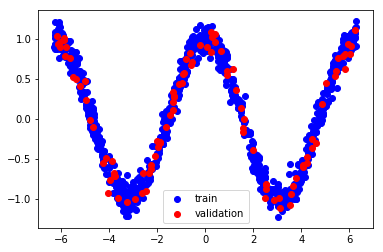

In [31]:
plt.figure(1)
plt.scatter(x_training, y_training, c = 'blue', label = 'train')
plt.scatter(x_validation, y_validation, c = 'red', label = 'validation')
plt.legend()

In [32]:
# Building the model
X = tf.placeholder(tf.float32, [None, 1], name = 'X')
y = tf.placeholder(tf.float32, [None, 1], name = 'y')

In [34]:
# Hidden layer of [1 x 10] dimensions
w_h = tf.Variable(tf.random_uniform([1, layer_1_neurons], 
                                    minval = -1, 
                                    maxval = 1, 
                                    dtype = tf.float32))
# Bias layer
b_h = tf.Variable(tf.zeros([1, layer_1_neurons], 
                           dtype = tf.float32))

In [35]:
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)

In [37]:
w_o = tf.Variable(tf.random_uniform([layer_1_neurons, 1],
                                    minval = -1,
                                    maxval = 1,
                                    dtype = tf.float32))

b_o = tf.Variable(tf.zeros([1, 1], dtype = tf.float32))

In [38]:
model = tf.matmul(h, w_o) + b_o

In [40]:
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - y))

In [41]:
tf.nn.l2_loss(model - y)

<tf.Tensor 'L2Loss_1:0' shape=() dtype=float32>

In [48]:
output = np.sum((model - y) ** 2) / 2

In [49]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

errors = []
for i in range(epochs):
    for start, end in zip(range(0, len(x_training), batch_size), range(batch_size, len(x_training), batch_size)):
        sess.run(train_op, feed_dict = {X: x_training[start:end], 
                                        y: y_training[start:end]})
    cost = sess.run(tf.nn.l2_loss(model - y_validation), feed_dict = {X: x_validation})
    errors.append(cost)
    if i % 100 == 0:
        print('Epoch: {} Cost: {}'.format(i, cost))

Epoch: 0 Cost: 29.391202926635742
Epoch: 100 Cost: 23.07007598876953
Epoch: 200 Cost: 18.76615333557129
Epoch: 300 Cost: 14.247583389282227
Epoch: 400 Cost: 10.087933540344238
Epoch: 500 Cost: 6.459544658660889
Epoch: 600 Cost: 3.7661538124084473
Epoch: 700 Cost: 2.109309196472168
Epoch: 800 Cost: 1.2916945219039917
Epoch: 900 Cost: 0.9553030133247375
Epoch: 1000 Cost: 0.8056235313415527
Epoch: 1100 Cost: 0.7208495140075684
Epoch: 1200 Cost: 0.6729631423950195
Epoch: 1300 Cost: 0.6438819169998169
Epoch: 1400 Cost: 0.6241742372512817


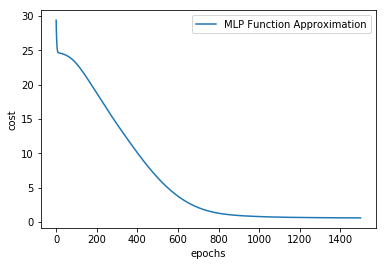

In [50]:
plt.plot(errors, label = 'MLP Function Approximation')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend()